In [112]:
exp <- read.csv('nose_jaw_spatial_diff_df.csv')

In [113]:
snp <- read.csv('genes_with_SNP_scores_spatial.csv')

In [114]:
# Create a named vector: names are genes, values are SNP score_avg
snp_score_vec <- setNames(snp$score_avg, snp$gene)

# Now align: create a vector of SNP scores for the genes in exp
snp_score_for_exp <- snp_score_vec[exp$X]  # exp$X are gene names

# This vector is now in the same order as exp, may contain NAs if gene is not in snp


In [115]:
# The rest is the same:
results <- data.frame(
  cluster = character(),
  r2 = numeric(),
  pval = numeric(),
  stringsAsFactors = FALSE
)

for (cl in colnames(exp)[2:57]) {
  expr_vec <- exp[[cl]]
  df_tmp <- data.frame(expr = expr_vec, snp = snp_score_for_exp)
  df_tmp <- df_tmp[complete.cases(df_tmp), ]

  if (nrow(df_tmp) > 2) {
    fit <- lm(expr ~ snp, data = df_tmp)
    r2 <- summary(fit)$r.squared
    pval <- summary(fit)$coefficients["snp", "Pr(>|t|)"]
    results <- rbind(results, data.frame(cluster = cl, r2 = r2, pval = pval))
  }
}

results <- results[order(-results$r2), ]
head(results, 20)


,cluster,r2,pval
,<chr>,<dbl>,<dbl>
17,X16_nose_ant,0.3919833,5.484345e-06
39,X38_nose_ant,0.3897041,5.948235e-06
40,X39_nose_ant,0.3714167,1.129857e-05
31,X30_nose_ant,0.3595741,1.696460e-05
8,X7_nose_ant,0.3422101,3.041595e-05
15,X14_nose_ant,0.3351931,3.835925e-05
38,X37_nose_ant,0.3034141,1.068614e-04
34,X33_nose_ant,0.3030056,1.082492e-04
2,X1_nose_ant,0.2934818,1.459750e-04


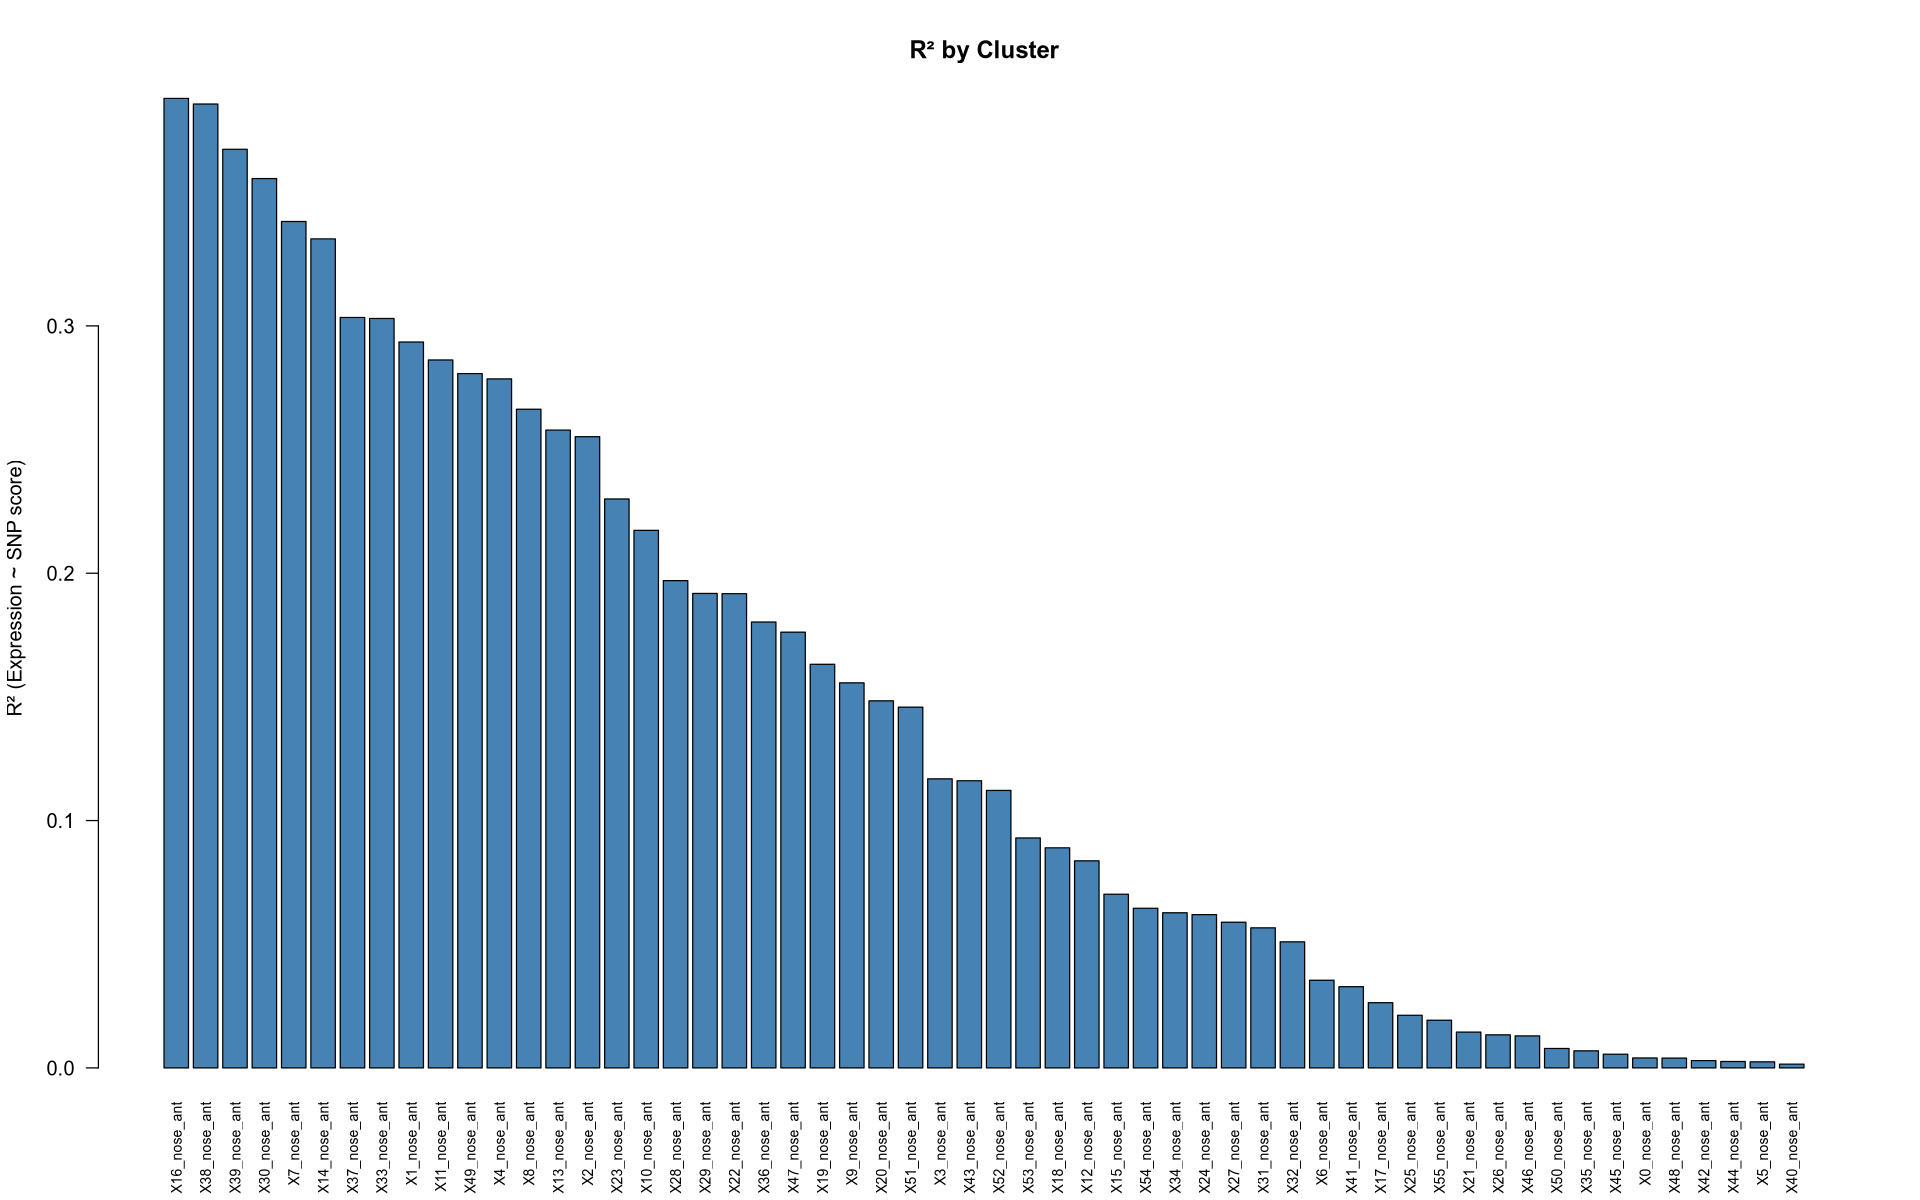

In [116]:
# Sort clusters by R²
results_sorted <- results[order(-results$r2), ]

# Barplot
barplot(
  results_sorted$r2,
  names.arg = results_sorted$cluster,
  las = 2,
  cex.names = 0.7,
  main = "R² by Cluster",
  ylab = "R² (Expression ~ SNP score)",
  col = "steelblue"
)


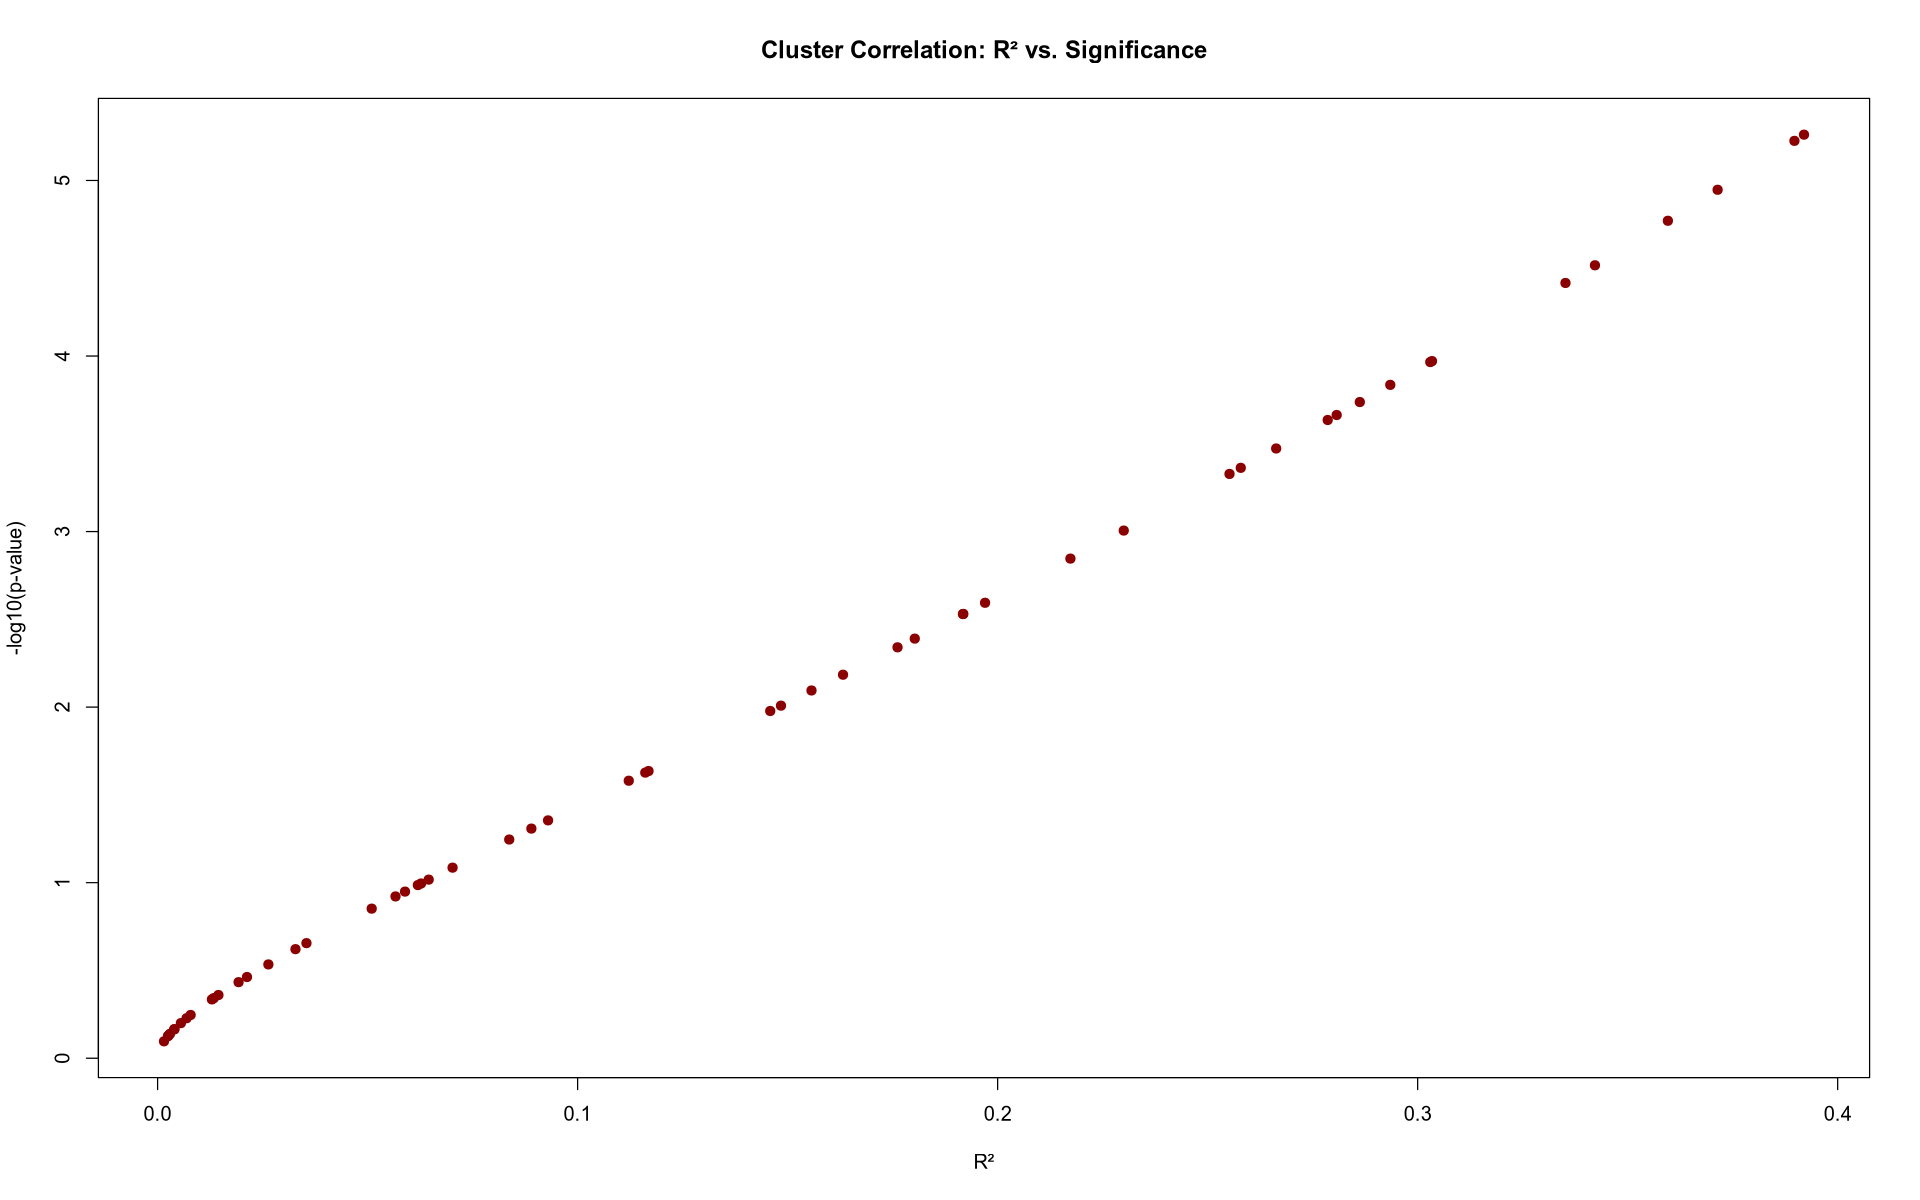

In [117]:
plot(
  results$r2, -log10(results$pval),
  pch = 19, col = "darkred",
  xlab = "R²",
  ylab = "-log10(p-value)",
  main = "Cluster Correlation: R² vs. Significance"
)


In [118]:
results <- data.frame(
  cluster = character(),
  r2 = numeric(),
  pval = numeric(),
  slope = numeric(),
  cor = numeric(),
  stringsAsFactors = FALSE
)


for (cl in colnames(exp)[2:57]) {
  expr_vec <- exp[[cl]]
  df_tmp <- data.frame(expr = expr_vec, snp = snp_score_for_exp)
  df_tmp <- df_tmp[complete.cases(df_tmp), ]

  if (nrow(df_tmp) > 2) {
    fit <- lm(expr ~ snp, data = df_tmp)
    r2 <- summary(fit)$r.squared
    pval <- summary(fit)$coefficients["snp", "Pr(>|t|)"]
    slope <- coef(fit)["snp"]
    cor_val <- cor(df_tmp$expr, df_tmp$snp)  # Pearson correlation

    results <- rbind(
      results,
      data.frame(cluster = cl, r2 = r2, pval = pval, slope = slope, cor = cor_val)
    )
  }
}


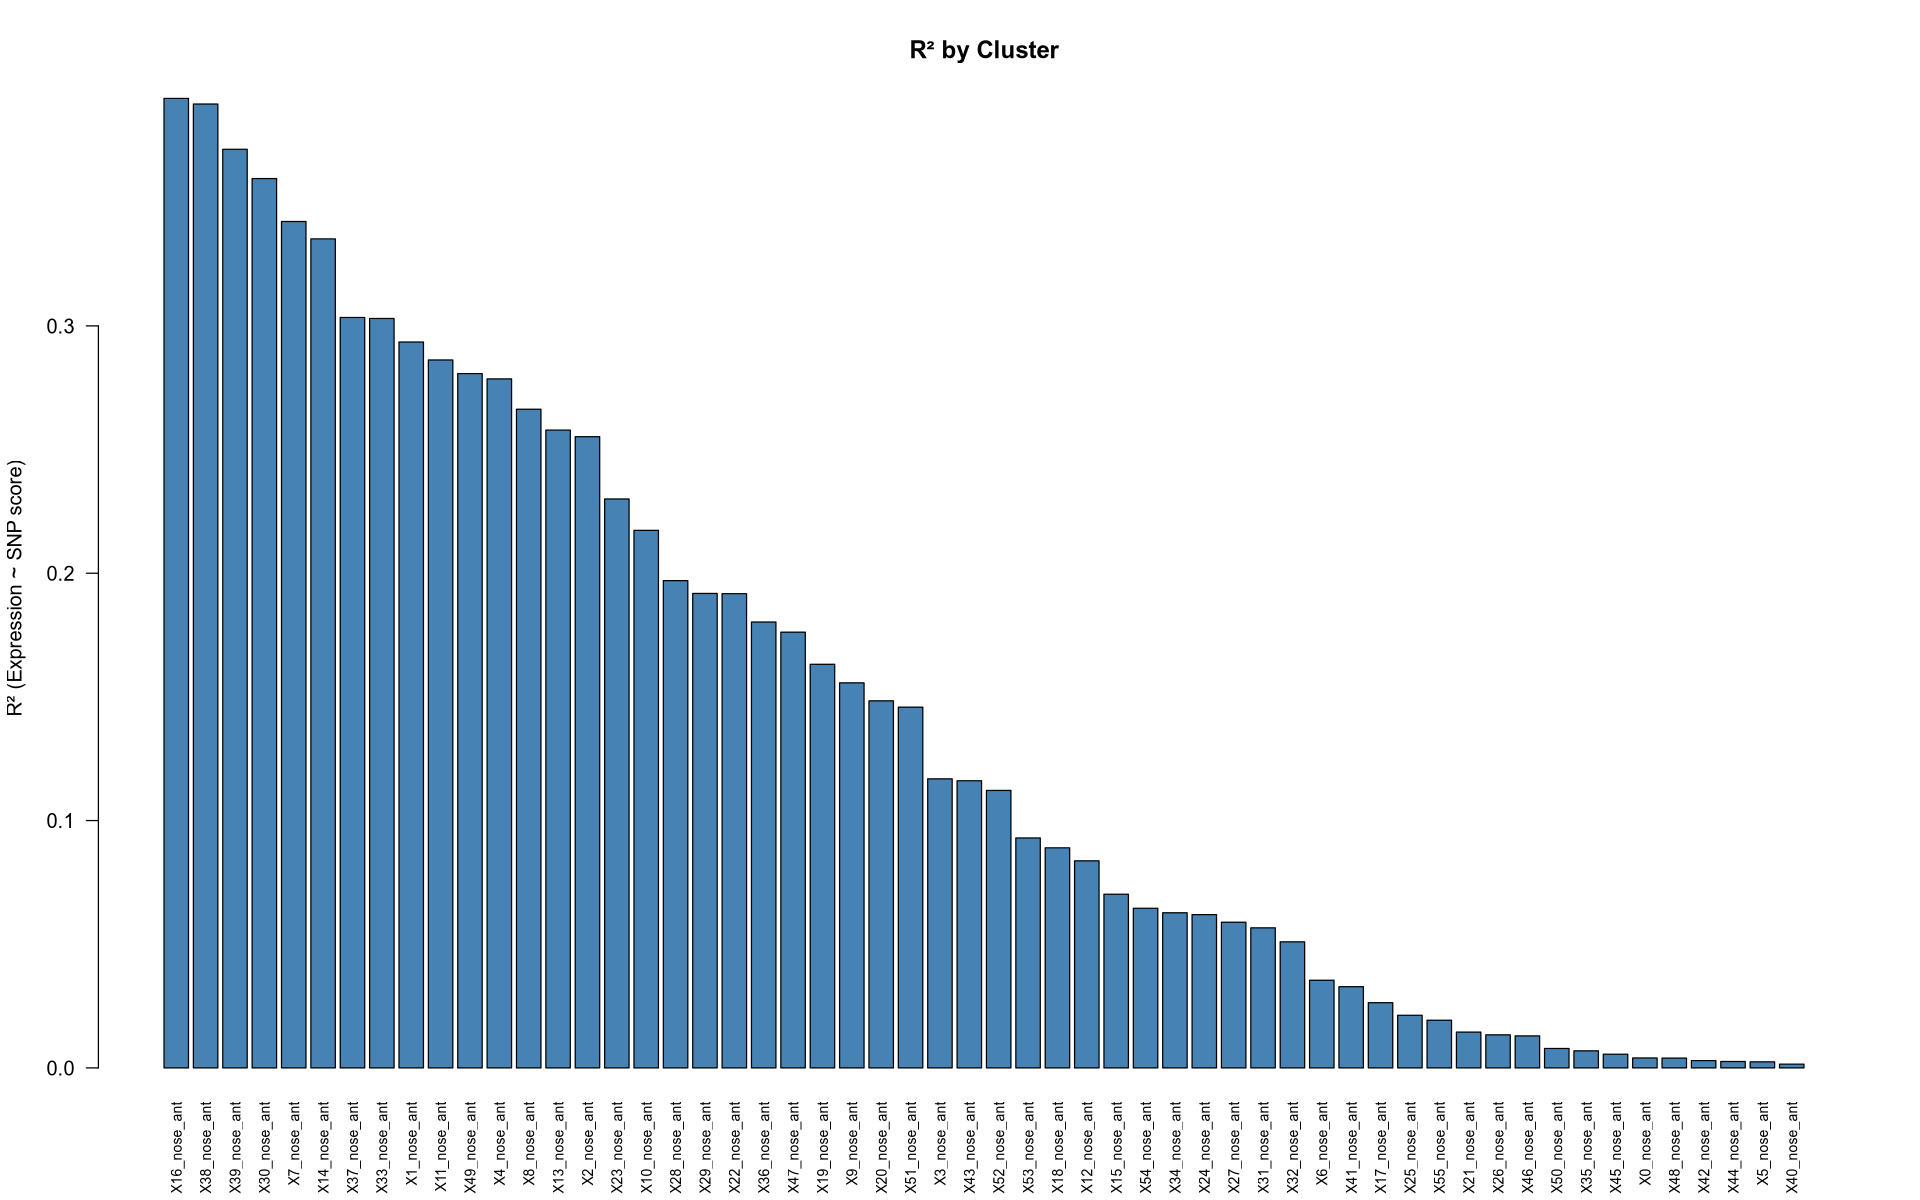

In [119]:
# Sort clusters by R²
results_sorted <- results[order(-results$r2), ]

# Barplot
barplot(
  results_sorted$r2,
  names.arg = results_sorted$cluster,
  las = 2,
  cex.names = 0.7,
  main = "R² by Cluster",
  ylab = "R² (Expression ~ SNP score)",
  col = "steelblue"
)

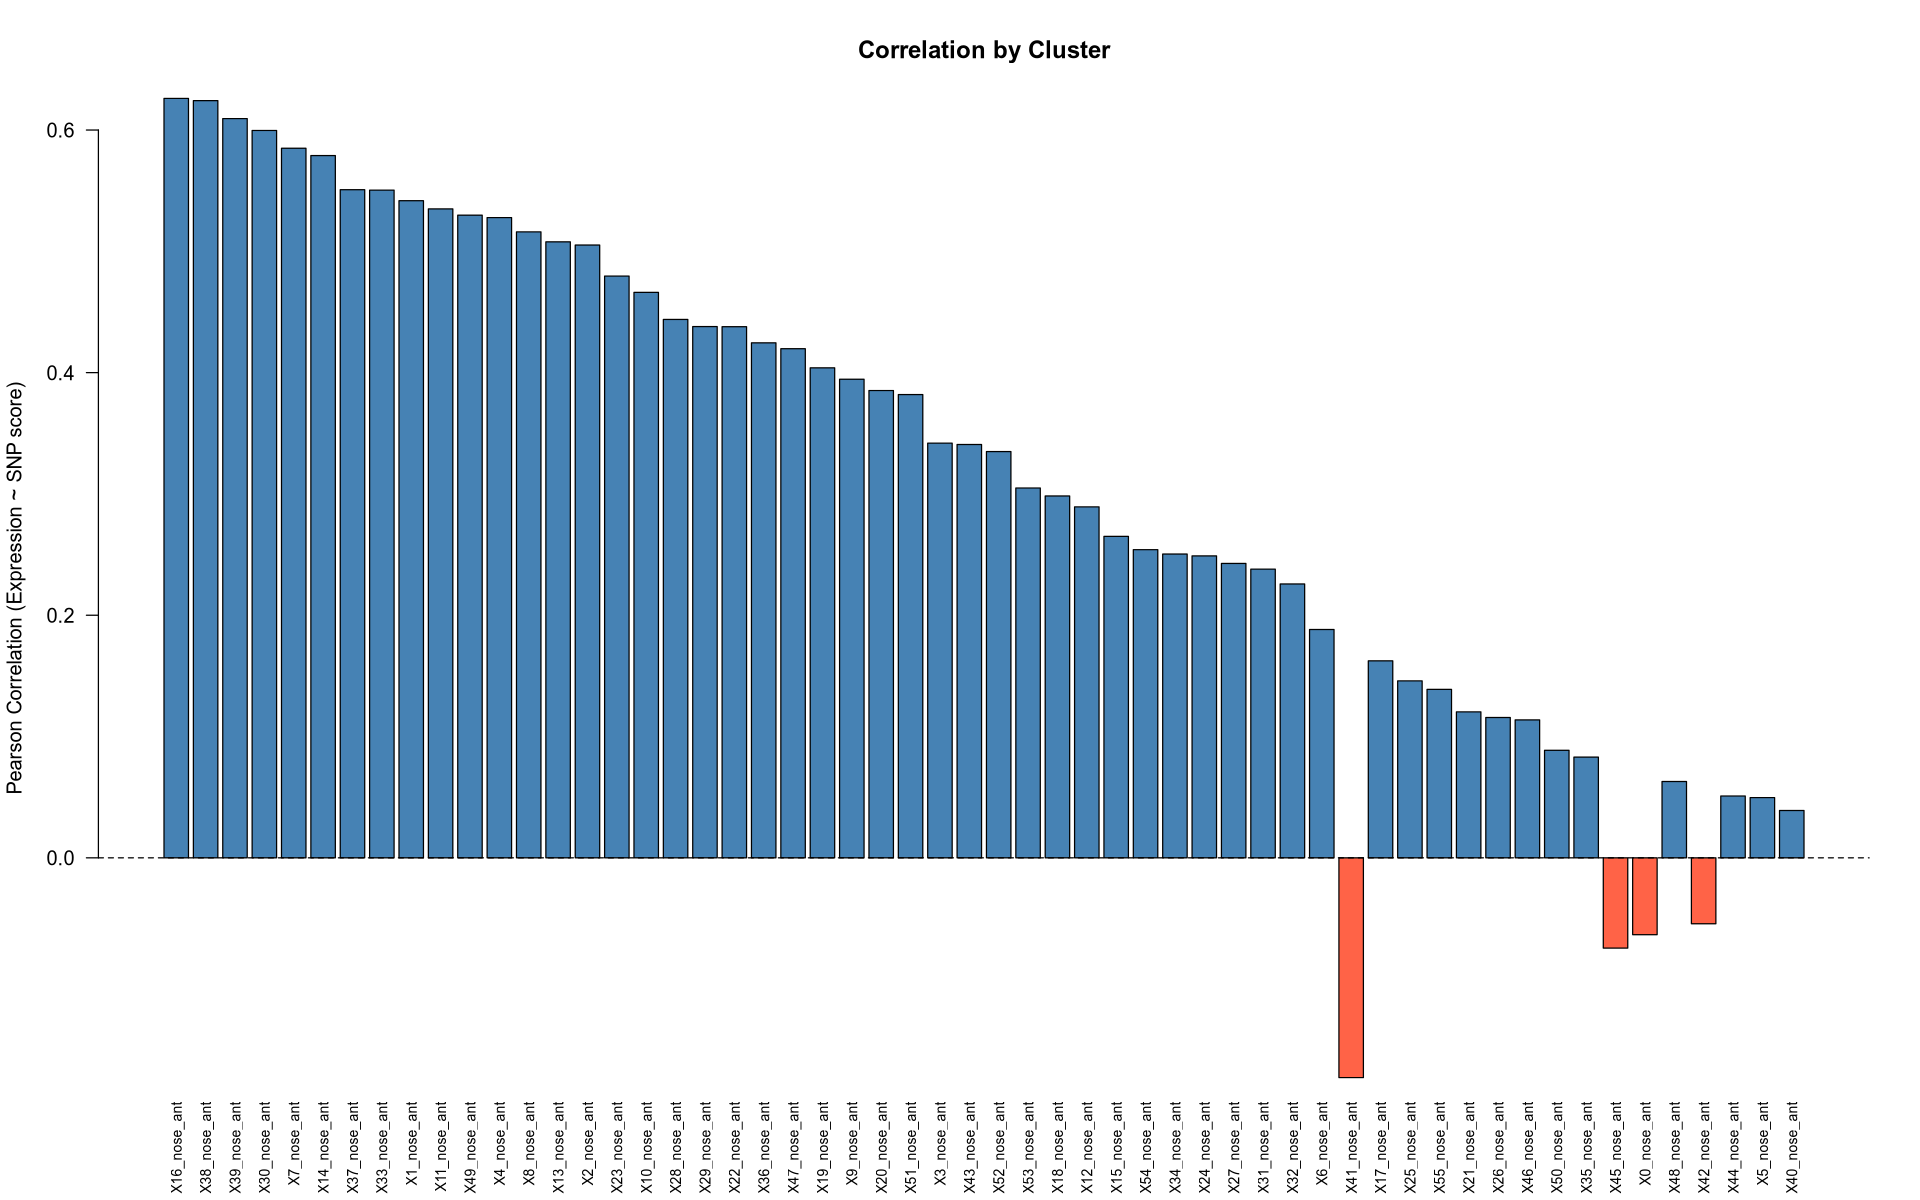

In [120]:
results_sorted <- results[order(-abs(results$cor)), ]  # sort by strength, keep sign
barplot(
  results_sorted$cor,
  names.arg = results_sorted$cluster,
  las = 2,
  cex.names = 0.7,
  main = "Correlation by Cluster",
  ylab = "Pearson Correlation (Expression ~ SNP score)",
  col = ifelse(results_sorted$cor > 0, "steelblue", "tomato")
)
abline(h = 0, lty = 2)  # Add a horizontal zero line


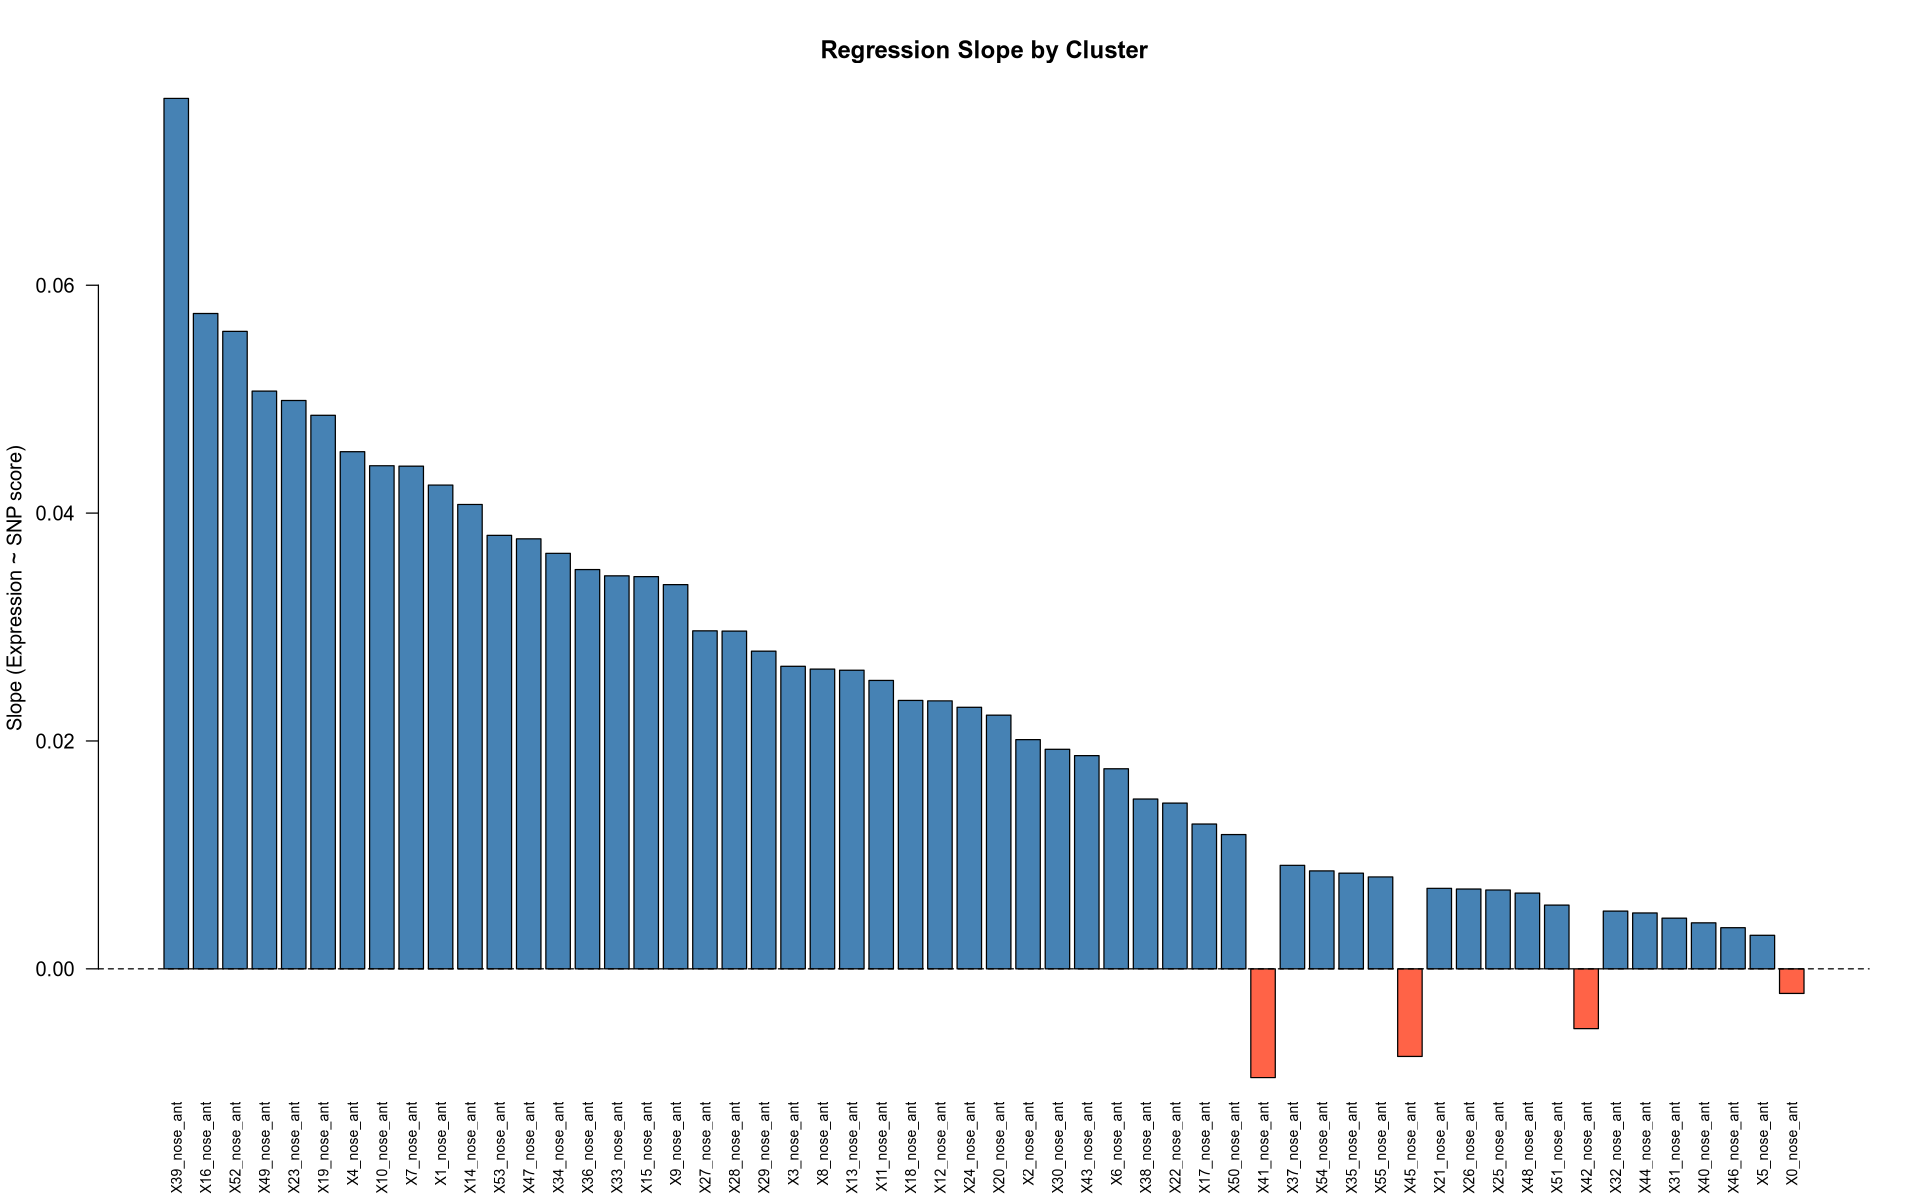

In [121]:
results_sorted <- results[order(-abs(results$slope)), ]
barplot(
  results_sorted$slope,
  names.arg = results_sorted$cluster,
  las = 2,
  cex.names = 0.7,
  main = "Regression Slope by Cluster",
  ylab = "Slope (Expression ~ SNP score)",
  col = ifelse(results_sorted$slope > 0, "steelblue", "tomato")
)
abline(h = 0, lty = 2)


In [122]:
# Make a wider plot window
# You can adjust width and height (in inches) to your needs
#png("correlation_by_cluster.png", width = 1800, height = 1100, res = 150)
options(repr.plot.width=16, repr.plot.height=10)  # or adjust numbers as needed


#dev.off()


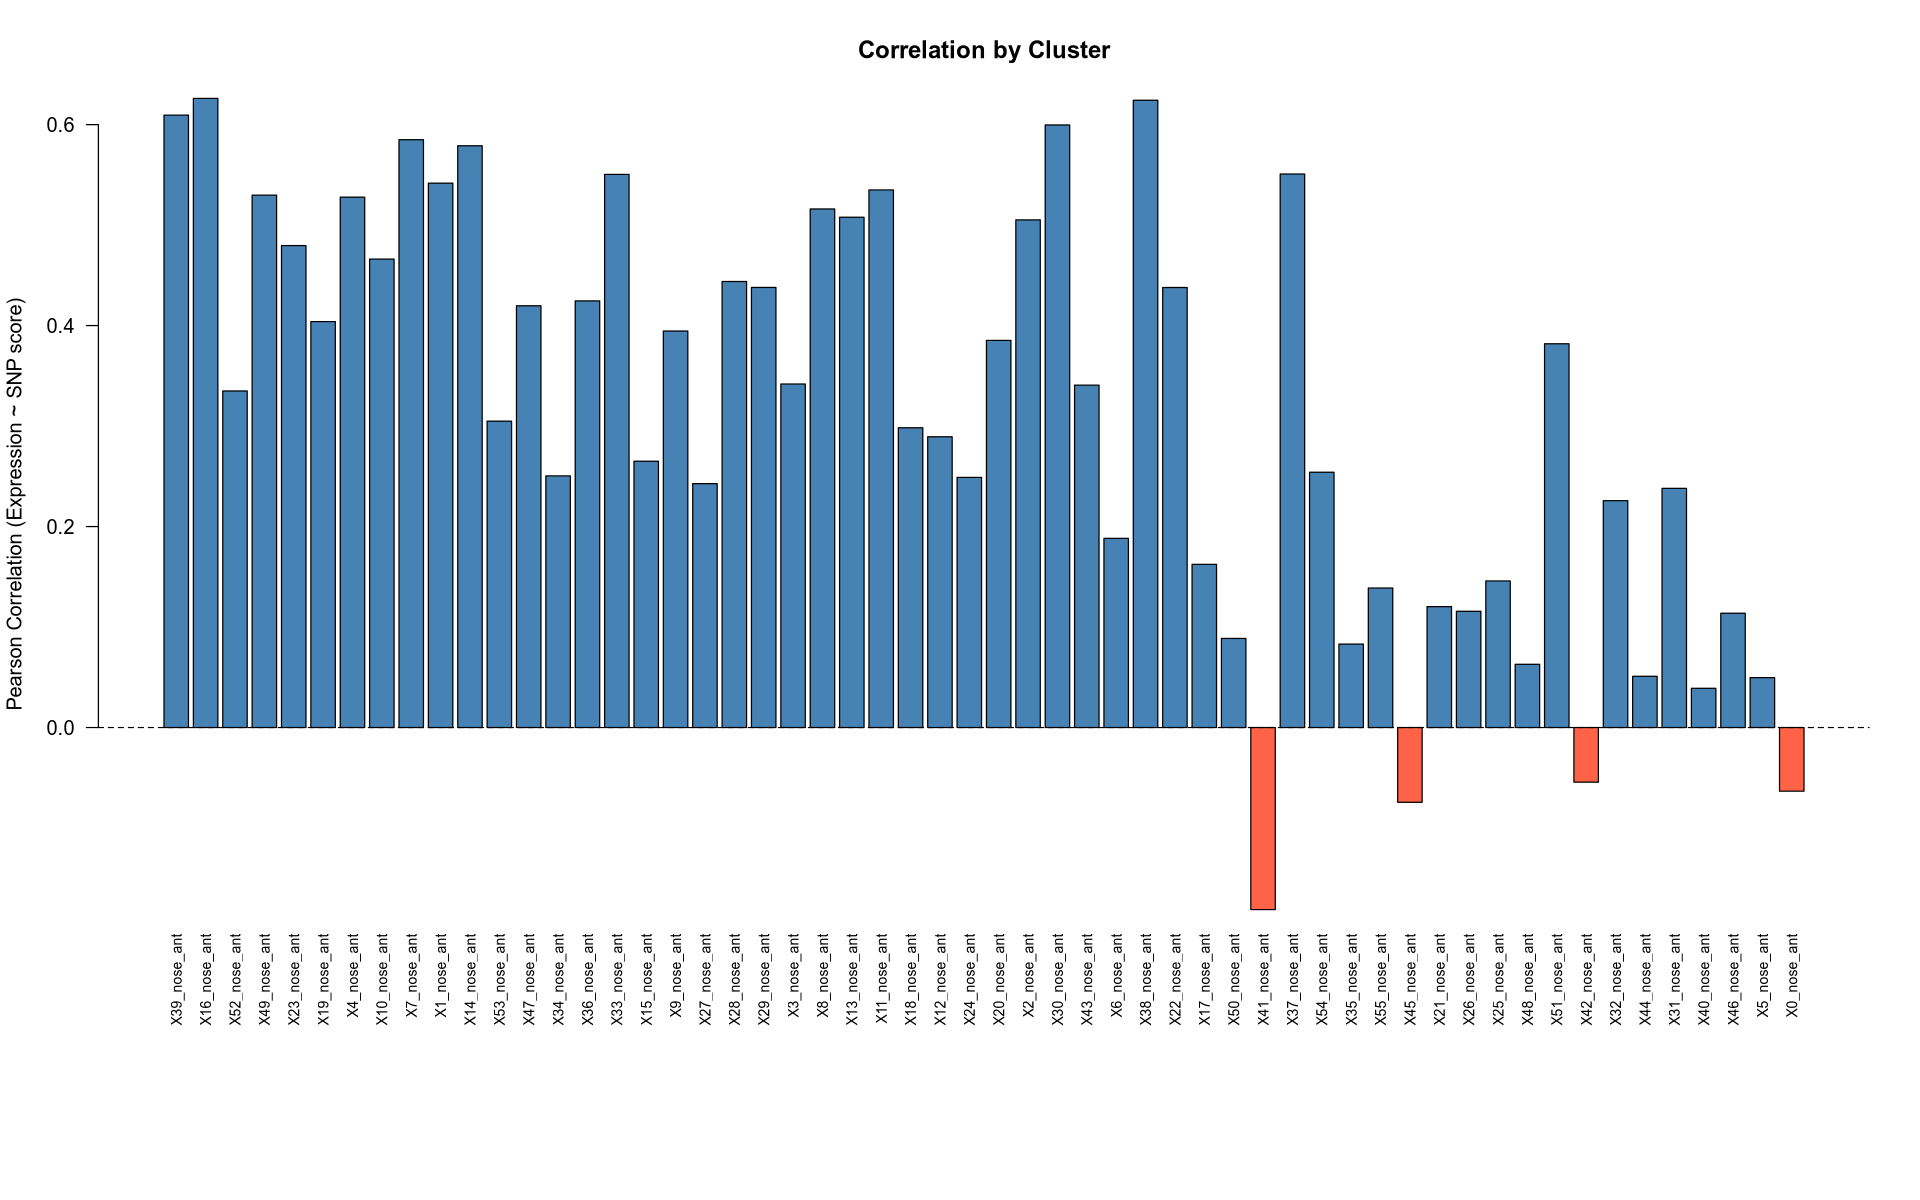

In [123]:
op <- par(mar = c(12, 4, 4, 2) + 0.1)  # bottom, left, top, right
barplot(
  results_sorted$cor,
  names.arg = results_sorted$cluster,
  las = 2,
  cex.names = 0.7,
  main = "Correlation by Cluster",
  ylab = "Pearson Correlation (Expression ~ SNP score)",
  col = ifelse(results_sorted$cor > 0, "steelblue", "tomato")
)
abline(h = 0, lty = 2)
par(op)  # reset to previous margins after plot


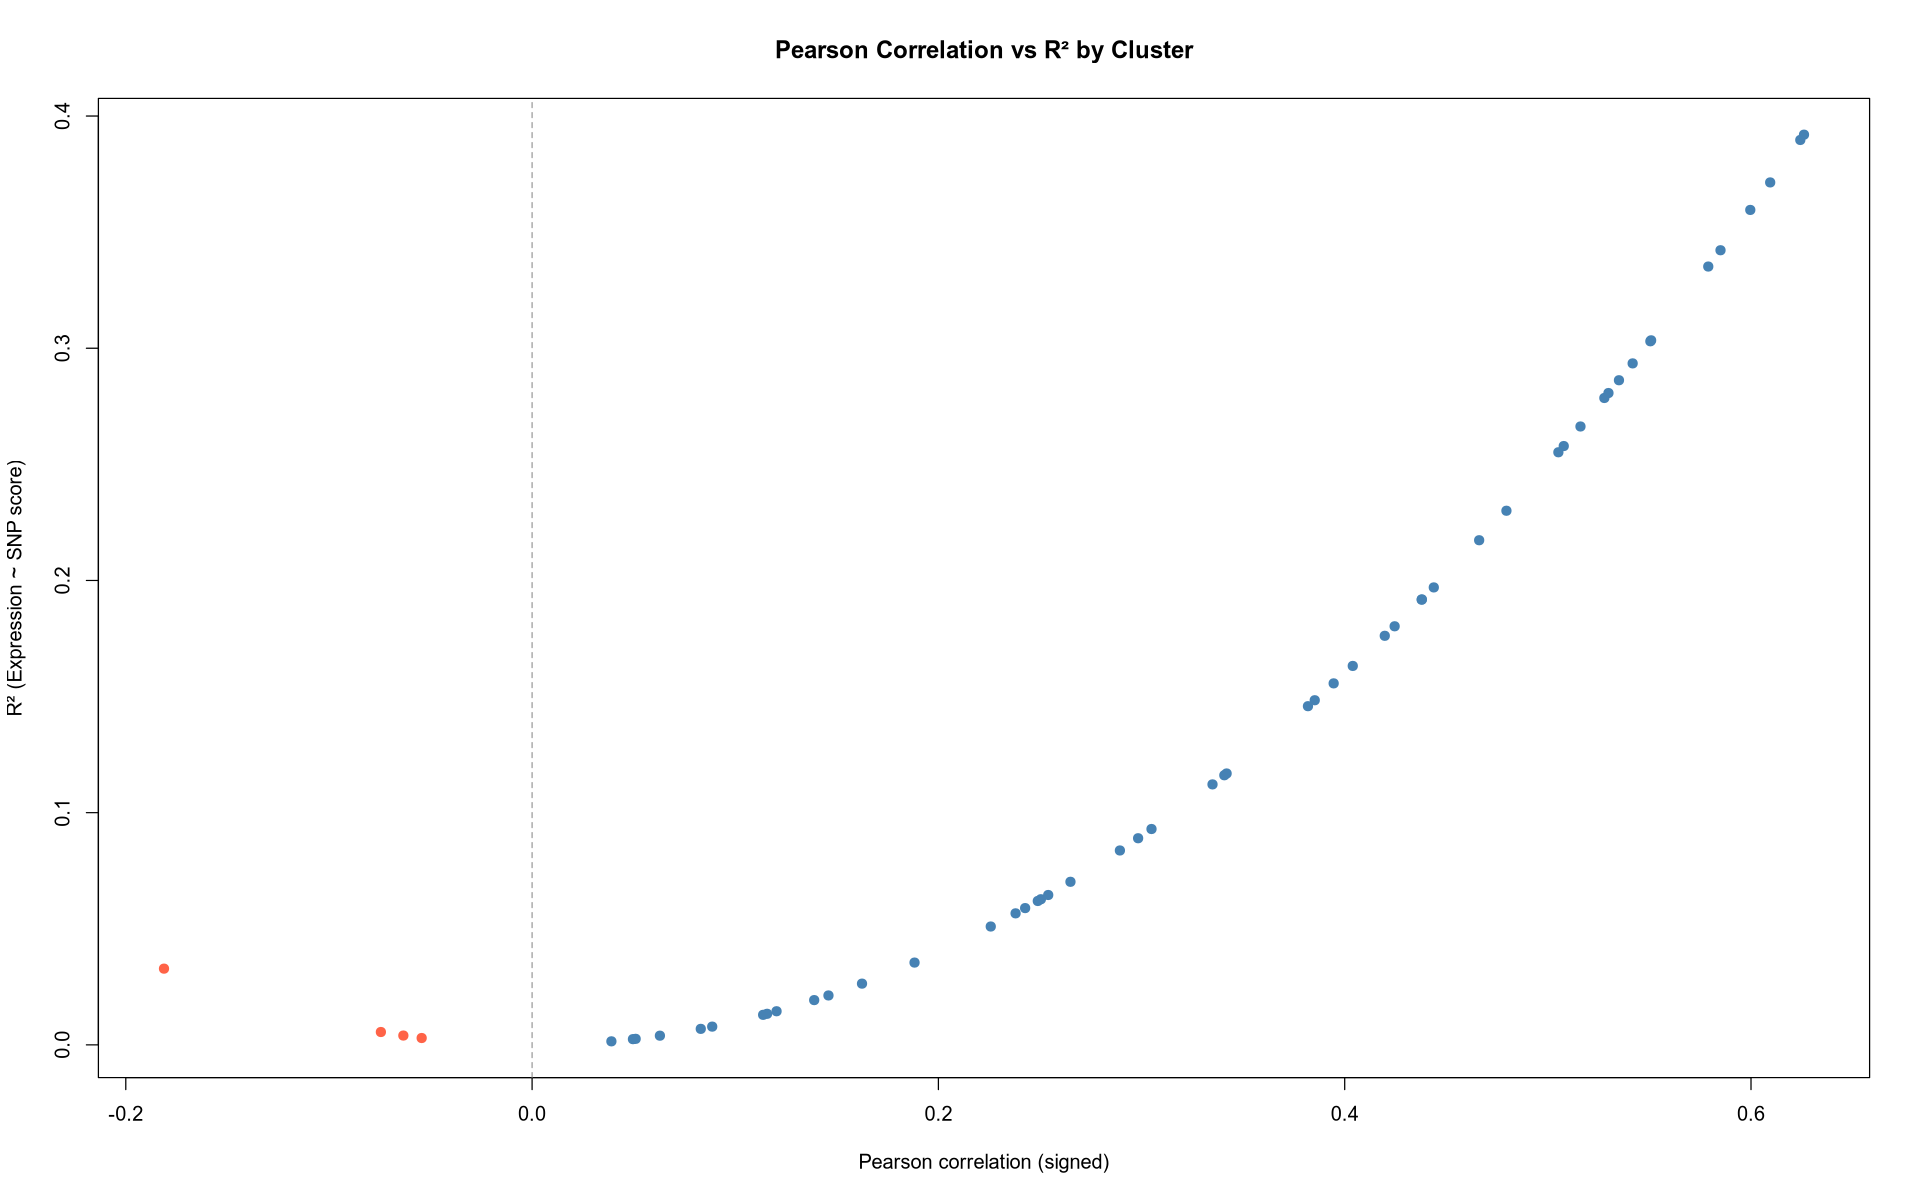

In [124]:
plot(
  results$cor, results$r2,
  xlab = "Pearson correlation (signed)",
  ylab = "R² (Expression ~ SNP score)",
  main = "Pearson Correlation vs R² by Cluster",
  pch = 19,
  col = ifelse(results$cor > 0, "steelblue", "tomato")
)
abline(v = 0, lty = 2, col = "gray60")


In [125]:
results$pval_adj <- p.adjust(results$pval, method = "fdr")

In [126]:
ks.test(results$pval, "punif")


	Exact one-sample Kolmogorov-Smirnov test

data:  results$pval
D = 0.55879, p-value = 1.887e-15
alternative hypothesis: two-sided


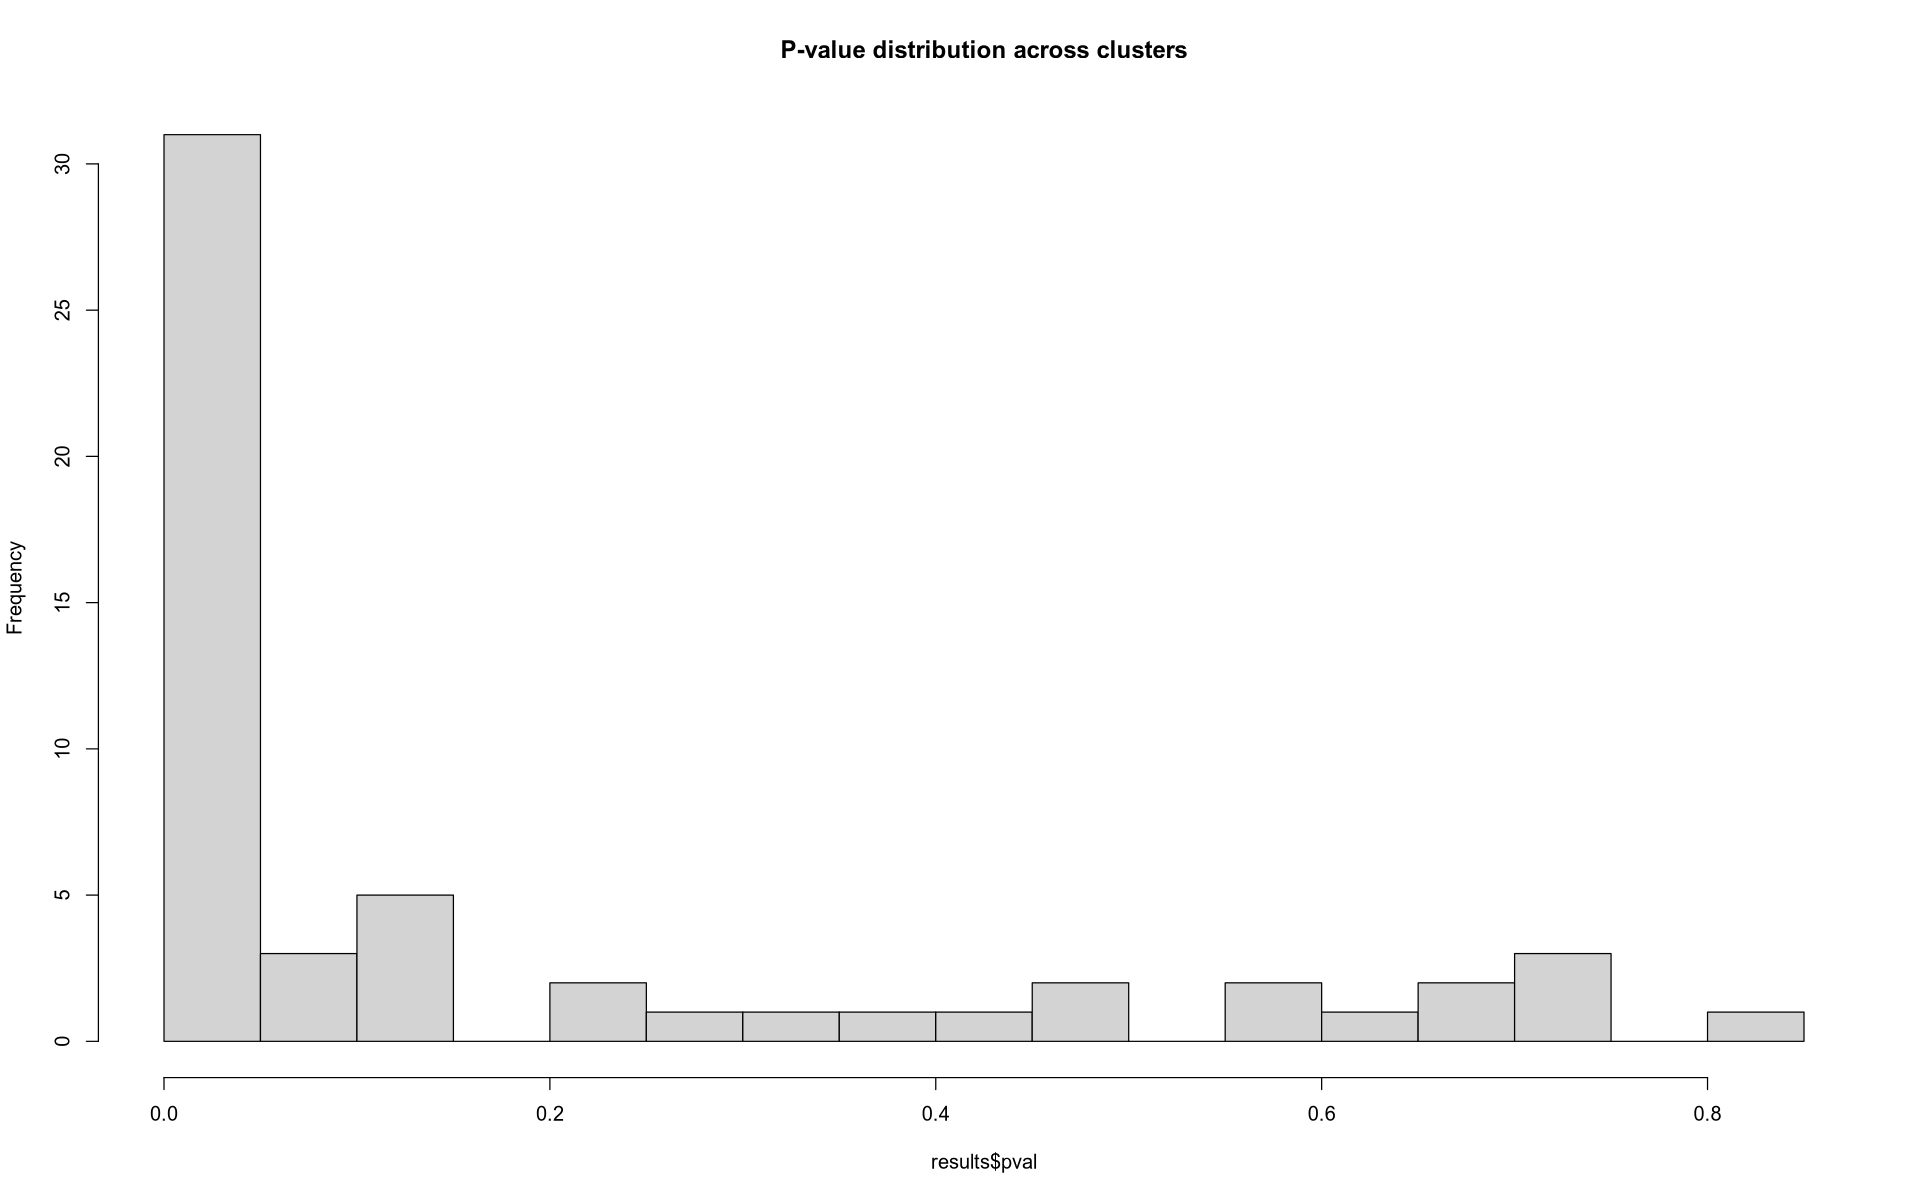

In [127]:
hist(results$pval, breaks=20, main="P-value distribution across clusters")

In [128]:
sum(results$cor > 0)   # Number of positive correlations
sum(results$cor < 0)   # Number of negative correlations

[1] 52

[1] 4

In [129]:
binom.test(sum(results$cor > 0), length(results$cor), p = 0.5)


	Exact binomial test

data:  sum(results$cor > 0) and length(results$cor)
number of successes = 52, number of trials = 56, p-value = 1.101e-11
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.8270953 0.9801961
sample estimates:
probability of success 
             0.9285714 


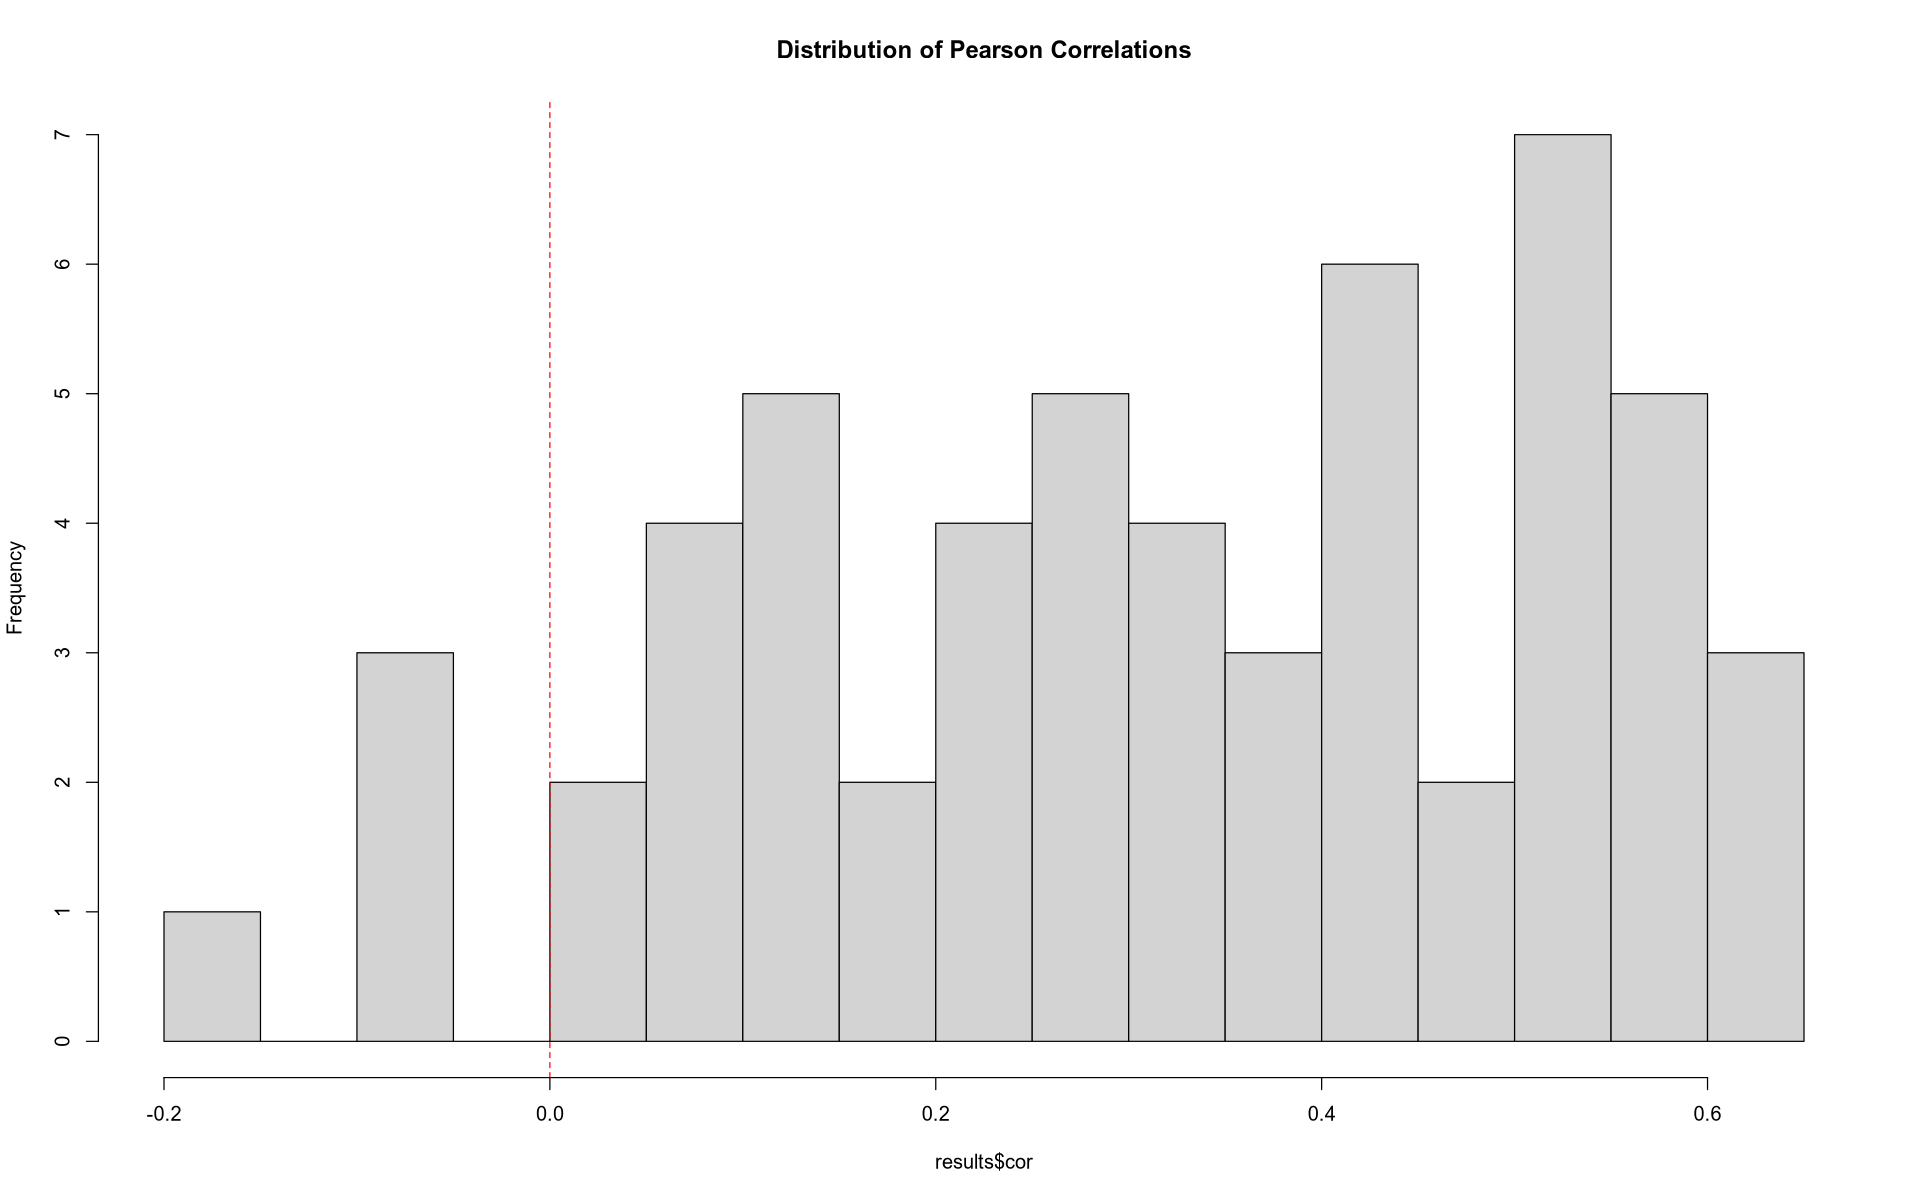

In [130]:
hist(results$cor, breaks=20, main="Distribution of Pearson Correlations")
abline(v=0, lty=2, col="red")


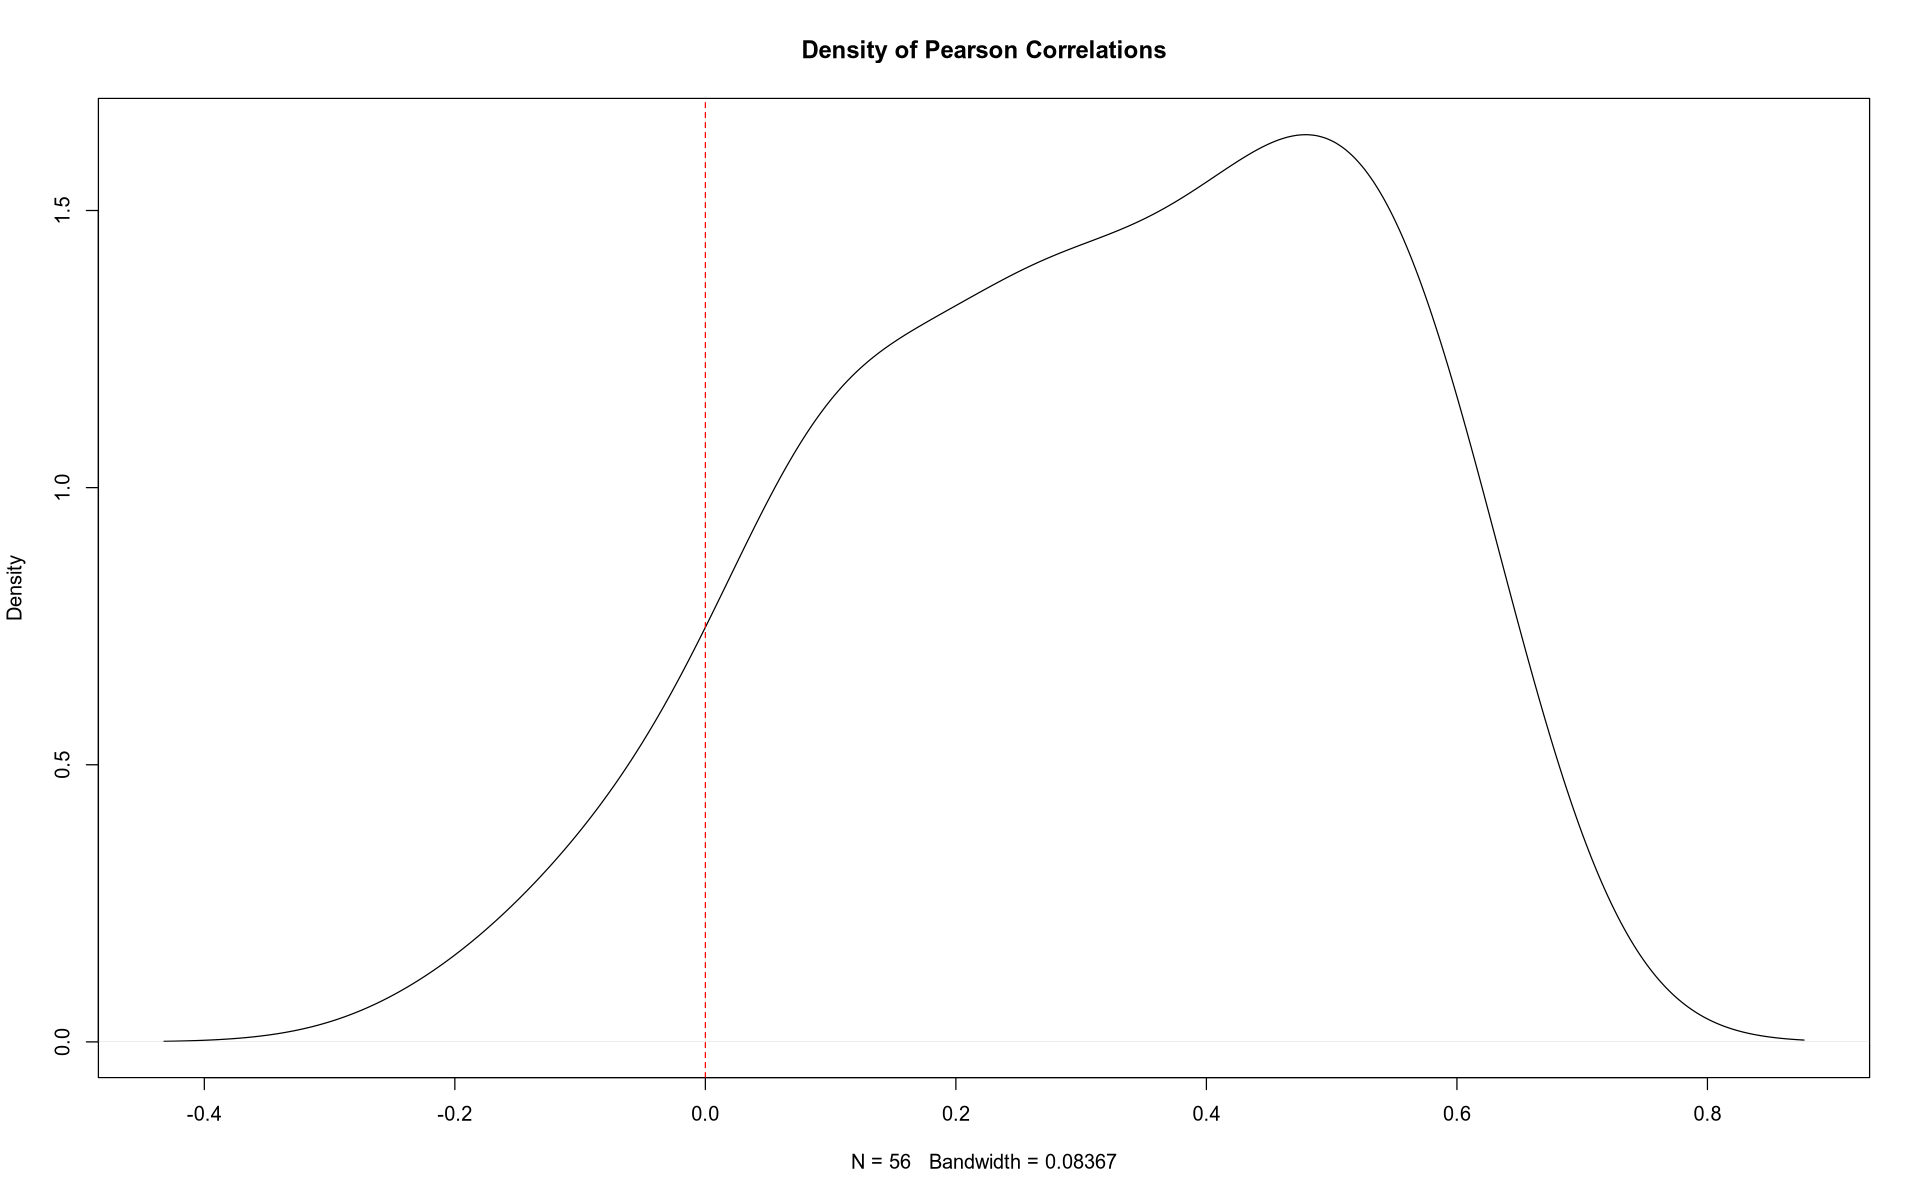

In [131]:
plot(density(results$cor), main="Density of Pearson Correlations")
abline(v=0, lty=2, col="red")

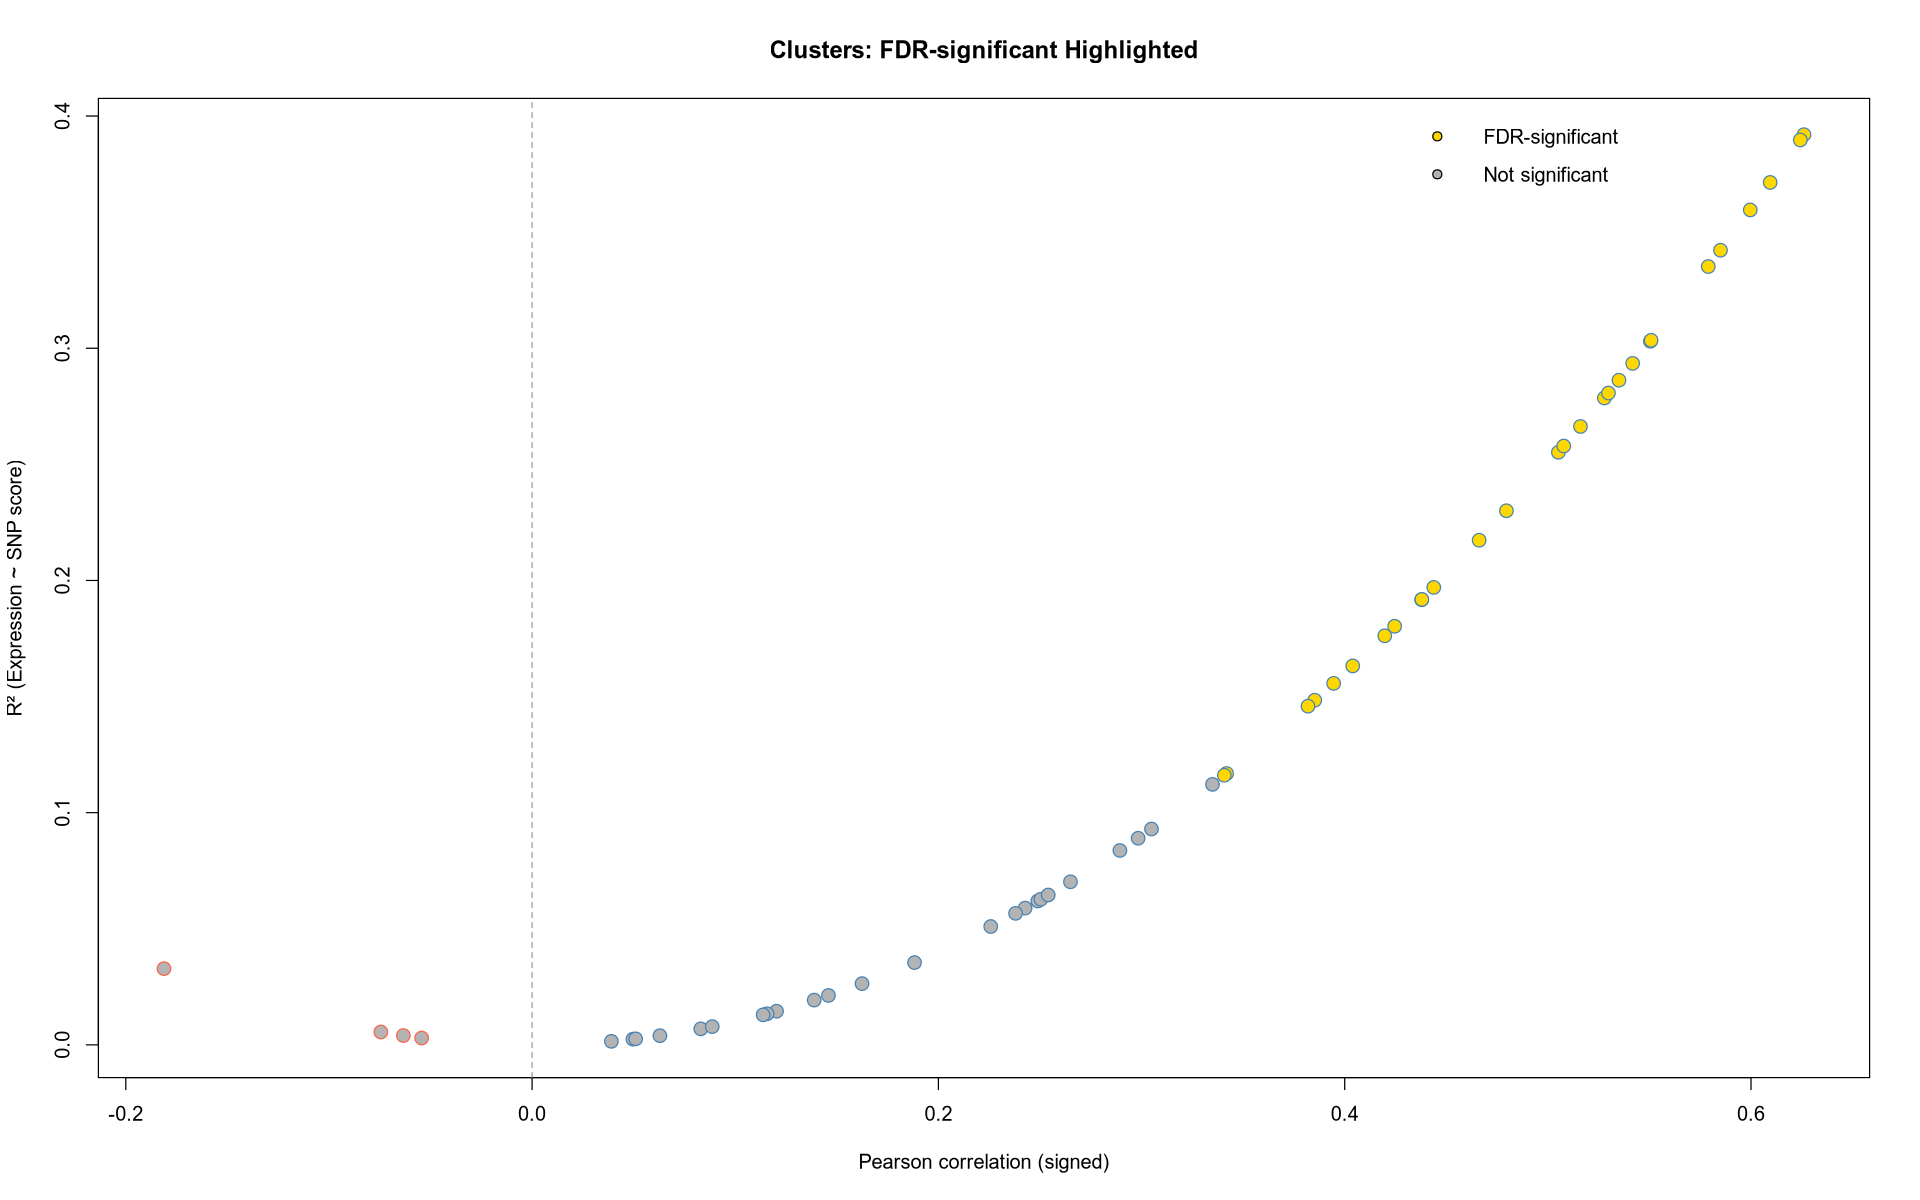

In [132]:
plot(
  results$cor, results$r2,
  xlab = "Pearson correlation (signed)",
  ylab = "R² (Expression ~ SNP score)",
  main = "Clusters: FDR-significant Highlighted",
  pch = 21,
  bg = ifelse(results$pval_adj < 0.05, "gold", "gray70"),
  col = ifelse(results$cor > 0, "steelblue", "tomato"),
  cex = 1.5
)
abline(v = 0, lty = 2, col = "gray60")
legend("topright", legend = c("FDR-significant", "Not significant"),
       pt.bg = c("gold", "gray70"), pch = 21, bty = "n")


In [141]:
pdf("cluster_sorted.pdf", width = 7, height = 5)

results_sorted <- results[order(results$cor, decreasing=TRUE), ]

bar_colors <- ifelse(results_sorted$pval_adj < 0.05, "gold", 
                     ifelse(results_sorted$cor > 0, "steelblue", "tomato"))

barplot(
  results_sorted$cor,
  names.arg = results_sorted$cluster,
  las = 2,
  cex.names = 0.7,
  main = "Correlation by Cluster (FDR-significant highlighted)",
  ylab = "Pearson Correlation",
  col = bar_colors
)
abline(h = 0, lty = 2)
legend("topright", legend = c("FDR-significant", "Positive", "Negative"),
       fill = c("gold", "steelblue", "tomato"), bty = "n")
dev.off()

pdf 
  2

In [134]:
results

,cluster,r2,pval,slope,cor,pval_adj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
snp,X0_nose_ant,0.004015679,6.827928e-01,-0.002158764,-0.06336938,0.7376359084
snp1,X1_nose_ant,0.293481776,1.459750e-04,0.042459799,0.54173958,0.0009082891
snp2,X2_nose_ant,0.255206593,4.696653e-04,0.020115644,0.50517976,0.0017534173
snp3,X3_nose_ant,0.116878436,2.312417e-02,0.026553597,0.34187488,0.0472231485
snp4,X4_nose_ant,0.278584515,2.314476e-04,0.045388347,0.52781106,0.0010800886
snp5,X5_nose_ant,0.002464699,7.489459e-01,0.002942749,0.04964573,0.7625630873
snp6,X6_nose_ant,0.035439691,2.210404e-01,0.017562210,0.18825433,0.3094565371
snp7,X7_nose_ant,0.342210112,3.041595e-05,0.044120661,0.58498727,0.0003406587
snp8,X8_nose_ant,0.266314913,3.363179e-04,0.026309343,0.51605708,0.0014487541
